In [3]:
import matplotlib.pyplot as plt
from pylab import rcParams

import numpy as np
import pandas as pd
import scipy.stats as stats

import pickle
import json

In [4]:
sigma1, sigma2, sigma3 = 0.6827, 0.9545, 0.9973
lambda1, lambda2, lambda3 = stats.chi2.ppf(sigma1, 2), stats.chi2.ppf(sigma2, 2), stats.chi2.ppf(sigma3, 2)

In [5]:
lambda1

2.2958151607859736

## Hubble constant and $\Omega_{\Lambda}$

In [23]:
with open('data/100_Omega_l_Hubble_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df = pd.DataFrame.from_dict(out)

df['Ratio'].replace([np.inf], df['Ratio'].replace(np.inf, np.nan).max(), inplace=True)

Text(0, 0.5, 'H (km/s Mpc)')

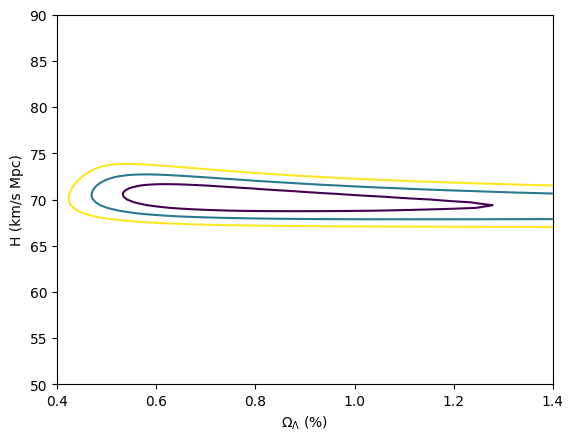

In [24]:
plt.tricontour(df.Omega_l, df.Hubble, df.Ratio, levels = [lambda1, lambda2, lambda3])

plt.ylim([50, 90])

plt.xlabel('$\Omega_{\Lambda}$ (%)')
plt.ylabel('H (km/s Mpc)')

## Hubble constant and $\Omega_{m}$

In [25]:
with open('data/100_Omega_m_Hubble_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df = pd.DataFrame.from_dict(out)

df['Ratio'].replace([np.inf], df['Ratio'].replace(np.inf, np.nan).max(), inplace=True)

Text(0, 0.5, 'H (km/s Mpc)')

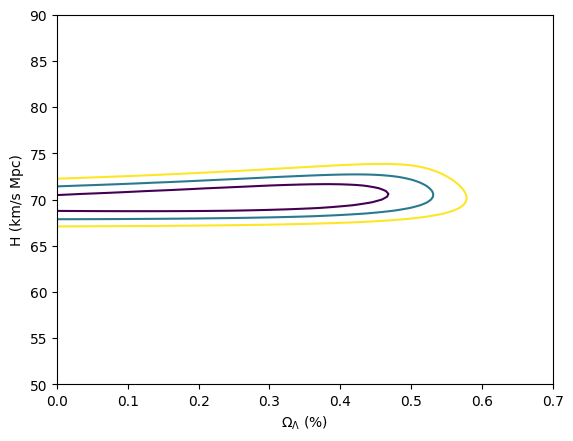

In [26]:
plt.tricontour(df.Omega_m, df.Hubble, df.Ratio, levels = [lambda1, lambda2, lambda3])

plt.ylim([50, 90])

plt.xlabel('$\Omega_{\Lambda}$ (%)')
plt.ylabel('H (km/s Mpc)')

# $\Omega_m$ and $\omega$

In [9]:
with open('data/100_Omega_m_w_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df = pd.DataFrame.from_dict(out)

df['Ratio'].replace([np.inf], df['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df = df.fillna(df['Ratio'].replace(np.inf, np.nan).max())

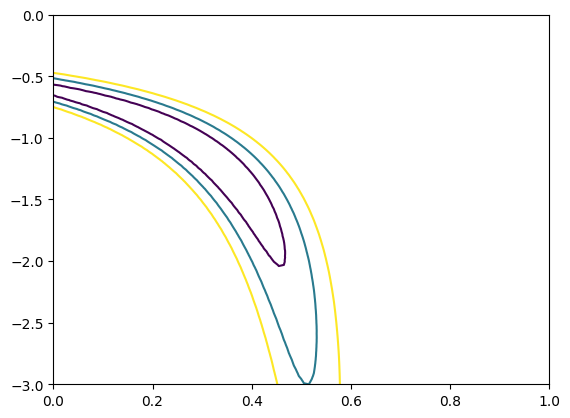

In [10]:
plt.tricontour(df.Omega_m, df.w, df.Ratio, levels = [lambda1, lambda2, lambda3])

# $\omega$ and Hubble

In [11]:
with open('data/100_w_Hubble_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df = pd.DataFrame.from_dict(out)

df['Ratio'].replace([np.inf], df['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df = df.fillna(df['Ratio'].replace(np.inf, np.nan).max())

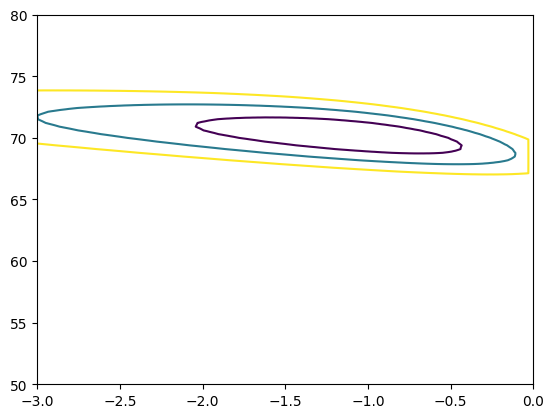

In [12]:
plt.tricontour(df.w, df.Hubble, df.Ratio, levels = [lambda1, lambda2, lambda3])

##  $\Omega_m$ and $\Omega_{\Lambda}$

In [21]:
with open('data/100_Omega_l_Omega_m_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df = pd.DataFrame.from_dict(out)

df['Ratio'].replace([np.inf], df['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df = df.fillna(df['Ratio'].replace(np.inf, np.nan).max())

Text(0, 0.5, '$\\Omega_{\\Lambda}$ (%)')

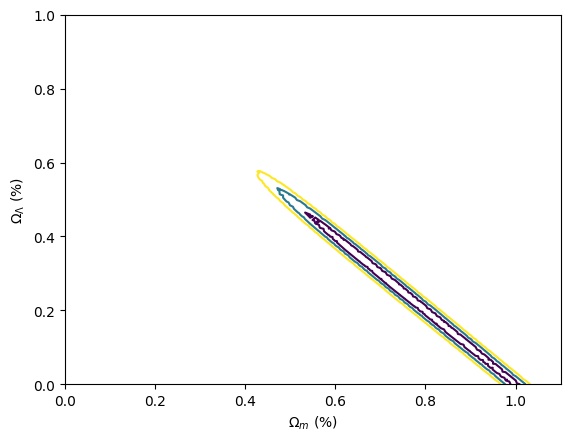

In [22]:
plt.tricontour(df.Omega_l, df.Omega_m, df.Ratio, levels = [lambda1, lambda2, lambda3])

plt.xlabel('$\Omega_{m}$ (%)')
plt.ylabel('$\Omega_{\Lambda}$ (%)')

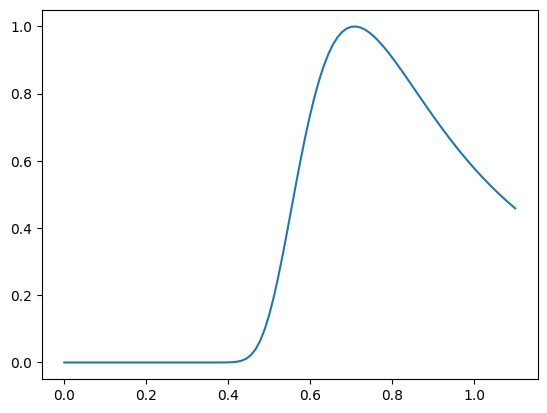

In [15]:
with open('data/100_Omega_l_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df = pd.DataFrame.from_dict(out)

df['Ratio'].replace([np.inf], df['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df = df.fillna(df['Ratio'].replace(np.inf, np.nan).max())

df['Ratio'] = np.exp(-0.5*df['Ratio'])

plt.plot(df.Omega_l, df.Ratio)

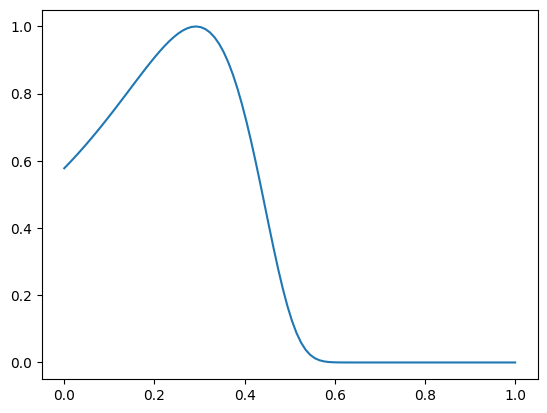

In [16]:
with open('data/100_Omega_m_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df = pd.DataFrame.from_dict(out)

df['Ratio'].replace([np.inf], df['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df = df.fillna(df['Ratio'].replace(np.inf, np.nan).max())

df['Ratio'] = np.exp(-0.5*df['Ratio'])

plt.plot(df.Omega_m, df.Ratio)

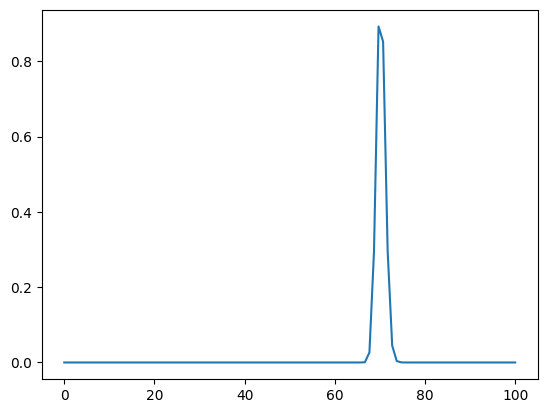

In [17]:
with open('data/100_Hubble_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df = pd.DataFrame.from_dict(out)

df['Ratio'].replace([np.inf], df['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df = df.fillna(df['Ratio'].replace(np.inf, np.nan).max())

df['Ratio'] = np.exp(-0.5*df['Ratio'])

plt.plot(df.Hubble, df.Ratio)

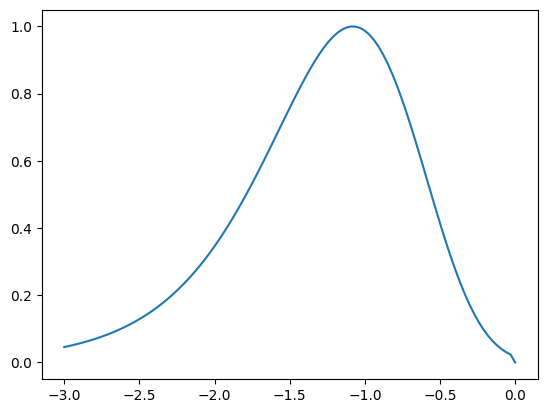

In [18]:
with open('data/100_w_likelihood_ratio.json', 'rb') as handle:
    out = json.load(handle)
    
df = pd.DataFrame.from_dict(out)

df['Ratio'].replace([np.inf], df['Ratio'].replace(np.inf, np.nan).max(), inplace=True)
df = df.fillna(df['Ratio'].replace(np.inf, np.nan).max())

df['Ratio'] = np.exp(-0.5*df['Ratio'])

plt.plot(df.w, df.Ratio)